# **Import Required libraries for RF, SVM , MLE algorithms**


In [96]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import scipy.io
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import colors


# **Import Data**

In [97]:
from google.colab import drive
drive.mount('/content/drive')

x = loadmat('/content/drive/MyDrive/Data/data01.mat')
y = loadmat('/content/drive/MyDrive/Data/class01.mat')
xor = loadmat('/content/drive/MyDrive/Data/data.mat')


L = y['class0']                                              # shape is ==> (3196, 1)
X= x['data0']                                                # Shape is ==> (3196, 8)
Xor = xor['data']                                            # Shape is ==> (1498800, 8)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Number of Each class

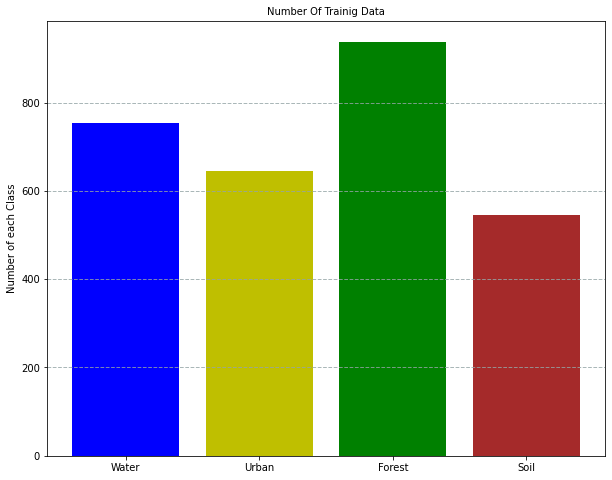

[754 644 938 545]


In [98]:

uniqueL, countsL = np.unique(L,return_counts=True)

plt.figure(figsize=(10, 8))
#plt.bar(uniqueL, countsL, color='royalblue', alpha=0.8)
plt.bar(uniqueL, countsL, color=['b', 'y', 'g', 'brown', 'cyan'])


plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.8)
plt.title('Number Of Trainig Data', fontsize=10)

plt.ylabel('Number of each Class', fontsize=10)
plt.xticks([1, 2, 3, 4], ['Water', 'Urban', 'Forest', 'Soil'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

print( countsL)


## Normalization

In [99]:
scaler = StandardScaler()

St_X= scaler.fit(X)
St_X = StandardScaler().fit_transform(X)

St_Xor = scaler.fit(Xor)
St_Xor = StandardScaler().fit_transform(Xor)

## Split Test AND Train Data

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(St_X, L, test_size = 0.30, random_state= 50, stratify=L)
print(np.shape(X_train),np.shape(X_test),np.shape(Y_train),np.shape(Y_test))

(2016, 8) (865, 8) (2016, 1) (865, 1)


# SVM Classifier

## GRID Search 

In [ ]:
from sklearn.svm import SVC
model = SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, Y_train)

In [7]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


## SVM Model Fitng

In [101]:
SVM = svm.SVC(C=1000, kernel='rbf', degree=3, gamma=0.1)
SVM.fit(X_train,Y_train)
predictions_SVM = SVM.predict(X_test)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Y_test)*100)

SVM Accuracy Score ->  99.76878612716763


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Generate Confusion Matrix For **SVM**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


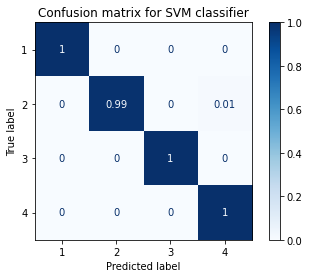

array([[226,   0,   0,   0],
       [  0, 191,   0,   2],
       [  0,   0, 282,   0],
       [  0,   0,   0, 164]])

In [102]:
plot_confusion_matrix(SVM, X_test, Y_test,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for SVM classifier')
plt.show()

confusion_matrix(Y_test, predictions_SVM)

## SVM Accuracy Assessment

In [103]:
print("SVM Overall Accuracy Score : ",accuracy_score(Y_test,predictions_SVM))
print("SVM Kappa coefficient : ",cohen_kappa_score(Y_test, predictions_SVM))

SVM Overall Accuracy Score :  0.9976878612716763
SVM Kappa coefficient :  0.9968746499788632


## Classified Map With SVM

In [104]:
SVM_pred  = SVM.predict(St_Xor)
image = SVM_pred.reshape(1200, 1249)

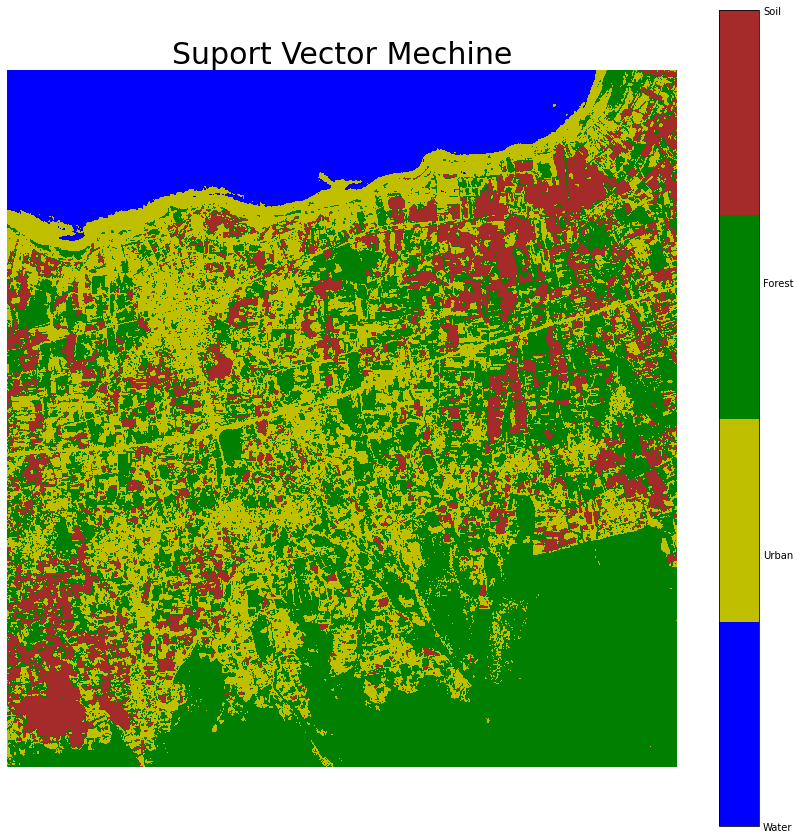

In [154]:
fig, ax = plt.subplots()
fig.set_size_inches([15,15])
cmap = colors.ListedColormap(['b', 'y', 'g', 'brown'])
cax = ax.imshow(image.T, cmap=cmap)
ax.set_title('Suport Vector Mechine',fontsize=30)
cbar = fig.colorbar(cax, ticks=[1, 2, 3, 4])
cbar.ax.set_yticklabels(['Water', 'Urban', 'Forest', 'Soil'])  # horizontal colorbar
cbar.ax.tick_params(size=0)
plt.axis('off')
plt.show()

# **Random Forest Classifier**

## Random Forest Model Fitting

In [107]:
LNE = [1, 20, 50, 100, 500, 1000]
AC = []
for NE in LNE:
  clf = RandomForestClassifier(n_estimators = NE) 
  clf.fit(X_train, Y_train)
  RF_pred = clf.predict(X_test)
  AC.append(accuracy_score(Y_test, RF_pred)*100)
Zip = list(zip(LNE,AC))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vect

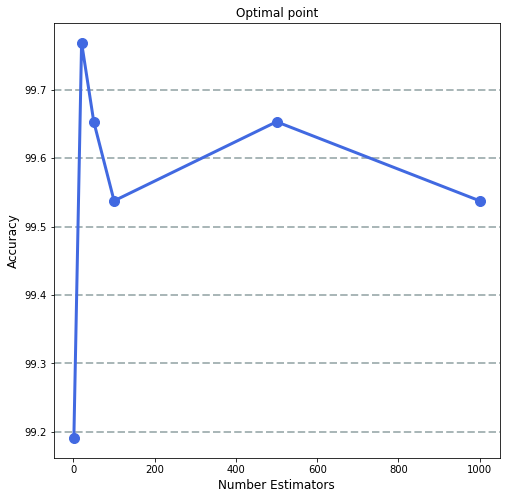

In [108]:
plt.figure(figsize=(8, 8))
plt.plot(LNE, AC, color='royalblue', marker="o", markersize=10, linewidth = 3)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.8)
plt.title('Optimal point', fontsize=12)
plt.xlabel('Number Estimators', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [109]:
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(X_train, Y_train)
RF_pred = clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


## Generate Confusion Matrix For **Random Forest**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


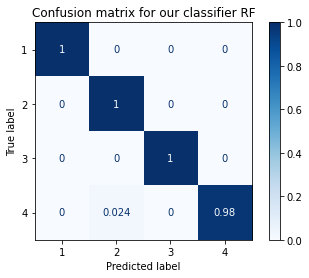

array([[226,   0,   0,   0],
       [  0, 193,   0,   0],
       [  0,   0, 282,   0],
       [  0,   4,   0, 160]])

In [110]:
plot_confusion_matrix(clf, X_test, Y_test,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for our classifier RF')
plt.show()

confusion_matrix(Y_test,RF_pred)

## Random Forest Accuracy Assessment

In [111]:
print("ACCURACY OF THE MODEL: ", accuracy_score(Y_test, RF_pred))

print("Random Forest Kappa coefficient : ",cohen_kappa_score(Y_test, RF_pred))

ACCURACY OF THE MODEL:  0.9953757225433526
Random Forest Kappa coefficient :  0.9937473344850767


## Classified Map With Random Forest

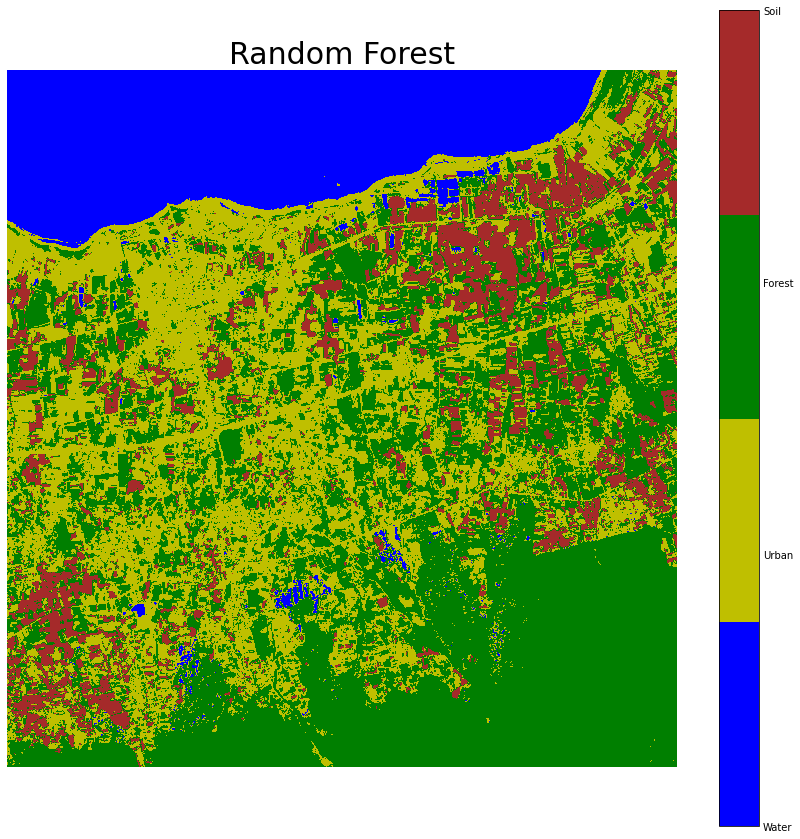

In [156]:
RF_pred = clf.predict(St_Xor)
image = RF_pred.reshape(1200, 1249)


fig, ax = plt.subplots()
fig.set_size_inches([15,15])
cmap = colors.ListedColormap(['b', 'y', 'g', 'brown'])
cax = ax.imshow(image.T, cmap=cmap)
ax.set_title('Random Forest', fontsize=30)
cbar = fig.colorbar(cax, ticks=[1, 2, 3, 4])
cbar.ax.set_yticklabels(['Water', 'Urban', 'Forest', 'Soil'])  # horizontal colorbar
cbar.ax.tick_params(size=0)
plt.axis('off')
plt.show()


# Maximum Likelihood Classifier

## Maximum Likelihood Model Fitting

In [120]:
# gnb = GaussianNB()
# MLE_pred = gnb.fit(X_train, Y_train).predict(X_test)

def MLE(X,y, test_size, plot_confusion = False, plot_class = False):
    # X, y = load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    # print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred, labels = [1, 2, 3, 4])
    if plot_confusion:
        plot_confusion_matrix(gnb, X_test, y_test,cmap=plt.cm.Blues,normalize='true')
        plt.title('Confusion matrix for MLE classifier')
        plt.show()
    if plot_class:
        unique_y, counts_y = np.unique(y_train,return_counts=True)
        # print(unique_y, counts_y)
        plt.figure(figsize=(5, 5))
        plt.bar(unique_y, counts_y, color='royalblue', alpha=0.8)
        plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.8)
        plt.title('Number Of Trainig Data', fontsize=10)
        #plt.xlabel('Class label', fontsize=10)
        plt.ylabel('Number of each Class', fontsize=10)
        #plt.xticks(fontsize=10)
        plt.xticks([1, 2, 3, 4], ['Water', 'Urban', 'Forest', 'Soil'], fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
        
    return [accuracy, gnb, conf_mat]

In [ ]:
log = [[], []]
for i in range(1,50,1):
    accuracy, gnb, conf_mat = MLE(X, L, i/100)
    log[0].append(i)
    log[1].append(accuracy)
    
bestTestSize = np.argmax(log[1])

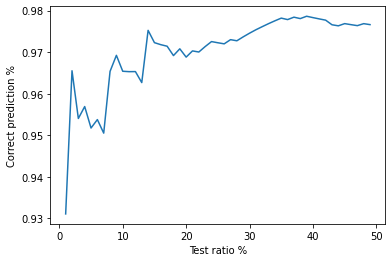

In [122]:
plt.plot(log[0],log[1])
plt.xlabel('Test ratio %')
plt.ylabel('Correct prediction %')
plt.show()

## Generate Confusion Matrix For MLC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


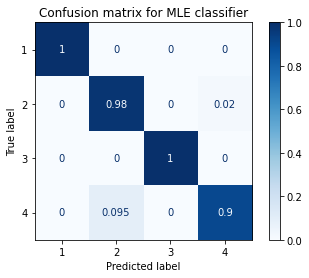

In [124]:
# conf_mat = confusion_matrix(Y_test, MLE_pred, labels = [1, 2, 3, 4])
# plot_confusion_matrix(gnb, X_test, Y_test,cmap=plt.cm.Blues,normalize='true')
# plt.title('Confusion matrix for MLE classifier')
# plt.show()

# matrix =confusion_matrix(Y_test, MLE_pred)

accuracy, gnb, conf_mat = MLE(X, L, bestTestSize/100, plot_confusion=True, plot_class = False )

## MLC Accuracy Assessment


In [118]:
# print("SVM Overall Accuracy Score : ",accuracy_score(Y_test,MLE_pred))
# print("SVM Kappa coefficient : ",cohen_kappa_score(Y_test, MLE_pred))


SVM Overall Accuracy Score :  0.9526011560693641
SVM Kappa coefficient :  0.9359723127418077


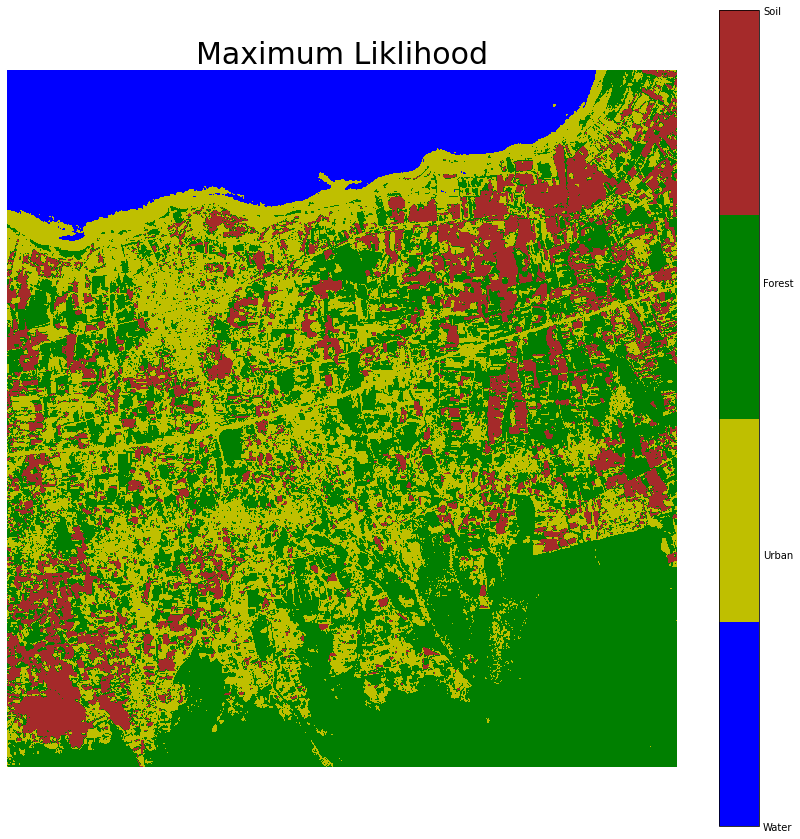

In [158]:
MLE_pred = gnb.predict(Xor)

image = MLE_pred.reshape(1200, 1249)
MLE_pred = gnb.predict(Xor)
image = MLE_pred.reshape(1200, 1249)

fig, ax = plt.subplots()
fig.set_size_inches([15,15])
cmap = colors.ListedColormap(['b', 'y', 'g', 'brown'])
cax = ax.imshow(image.T, cmap=cmap)
ax.set_title('Maximum Liklihood', fontsize=30)
cbar = fig.colorbar(cax, ticks=[1, 2, 3, 4])
cbar.ax.set_yticklabels(['Water', 'Urban', 'Forest', 'Soil'])  # horizontal colorbar
cbar.ax.tick_params(size=0)
plt.axis('off')
plt.show()

# **Analysis Results**

##   Area of ​​classes obtained from SVM , RF , MLE









In [127]:
uniqueRF, countsRF = np.unique(RF_pred, return_counts=True)
uniqueSVM, countsSVM = np.unique(SVM_pred, return_counts=True)
uniqueMLE, countsMLE = np.unique(MLE_pred, return_counts=True)

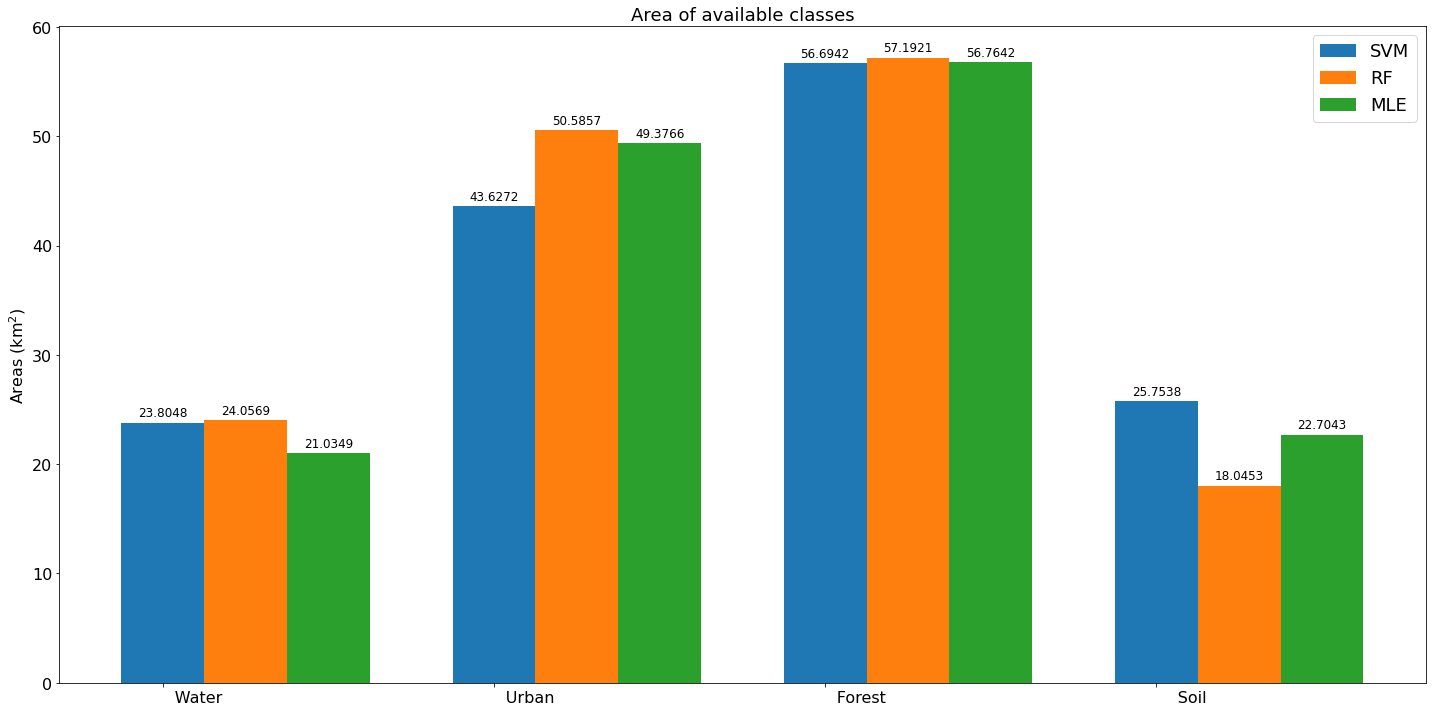

In [161]:
labels = ['              Water', '              Urban', '              Forest', '              Soil']


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))

rects1 = ax.bar(x, (countsSVM*100)/1000**2 , width, label='SVM')
rects2 = ax.bar(x+width, (countsRF*100)/1000**2, width, label='RF')
rects3 = ax.bar(x+width*2, (countsMLE*100)/1000**2, width, label='MLE')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Area of ​​available classes', fontsize=18)
ax.set_ylabel('Areas (km$^2$)', fontsize=16)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.legend(prop={"size":18})


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

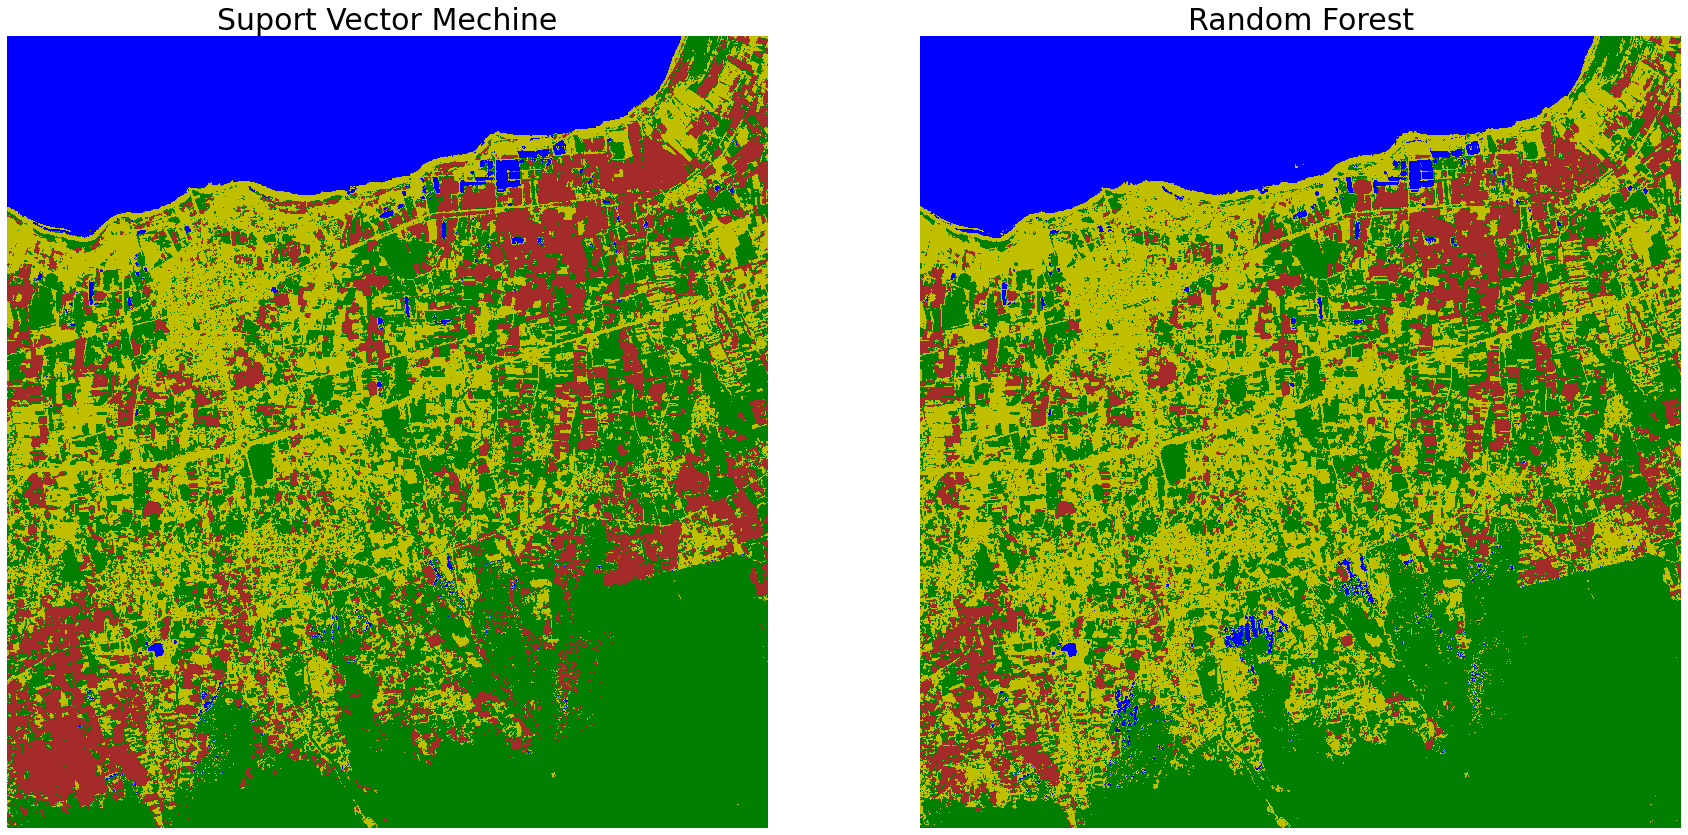

In [148]:
SVM_image = SVM_pred.reshape(1200, 1249)
RF_image = RF_pred.reshape(1200, 1249)
MLE_image = MLE_pred.reshape(1200, 1249)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.set_size_inches([30,30])
cmap = colors.ListedColormap(['b', 'y', 'g', 'brown'])
ax[0].imshow(SVM_image.T, cmap=cmap)
ax[0].set_title('Suport Vector Mechine',fontsize=30)
ax[0].axis('off')

ax[1].imshow(RF_image.T, cmap=cmap)
ax[1].set_title('Random Forest',fontsize=30)
ax[1].axis('off')

# ax[2].imshow(MLE_image.T, cmap=cmap)
# ax[2].set_title('Maximum Liklihood',fontsize=20)
# ax[2].axis('off')


# cbar = fig.colorbar(cax, ticks=[1, 2, 3, 4])
# cbar.ax.set_yticklabels(['Water', 'Urban', 'Forest', 'Soil'])  # horizontal colorbar
# cbar.ax.tick_params(size=0)
plt.show()